# This is a linear regression example. 
Let's begin with importing the libraries required for linear regression.

In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

## We'll first generate fake *almost* linear data
1. Create a (1000, 1) sized matrix of numbers ranging from 1 to 1000.
2. Create a matrix y using the equation of line with slope 2 and y-intercept 1 and add gaussian noise, so it's not exactly linear. 
3. Plot the data for visualization
3. Find mean, max, and min of the input matrix X.
4. Normalize the matrix X - (as normalizing input data eases the process of gradient descent).

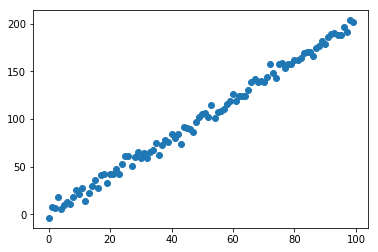

In [2]:
%matplotlib inline

X = np.matrix(range(100)).T
y = 2*X + 1 + np.random.normal(0, 5, (100,1))
plt.scatter(X, y)

mu = np.mean(X)
max = np.max(X)
min = np.min(X)
X = (X-mu)/(max-min)

## Create TensorFlow nodes needed for computational graph
1. Create slope variable - W - also known as weight.
2. Create y-intercept variable - b - also known as bias.
3. Create input placeholder x
4. Create output placeholder y_

Read documentation of tf.Variable and tf.placeholder to understand more

In [3]:
W = tf.Variable(tf.zeros([1]), tf.float32)
b = tf.Variable(tf.zeros([1]), tf.float32)

x = tf.placeholder(tf.float32, [None, 1])
y_ = tf.placeholder(tf.float32, [None, 1])

# Construct computational graph
1. Construct a linear model in tensorflow which will be used for prediction. This linear model is constructed within as tensorflow graph
2. Decleare mean squared error (mse) as a computational graph

In [4]:
pred_y = tf.multiply(W,x) + b
mse = tf.reduce_mean(tf.squared_difference(pred_y, y_))/2

# Declare Hyperparameters
1. Train Step Variable that is a Gradient Descent optimizer with 0.5 learning rate and is trying to mse create in the previous cell
2. Declare a history list that stores the error over all the epochs
3. Create a session and initialize all variables (W and b)
4. Run a for loop for 1000 epochs, and run the session to train the linear model
5. After for loop, save the value of W and b in another variable for plotting the line later

In [5]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(mse)
history = []
slope = 0
y_intercept = 0
with tf.Session() as sess:
    init_op = tf.global_variables_initializer().run()
    for i in range(1000):
        sess.run(train_step,{y_:y, x:X})
        history.append(sess.run(mse, {y_:y, x:X}))
    slope = sess.run([W])
    y_intercept = sess.run([b])

# Plot the error history - It should quickly go down to almost 0 (as our data was almost linear)

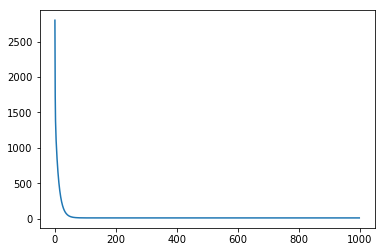

In [6]:
plt.plot(history)

# Plot the model (line obtained after training) along with training data

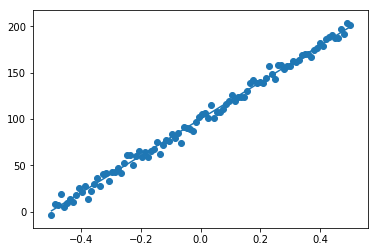

In [7]:
input_x = np.matrix(range(100)).T
normalizeX = (input_x - mu)/(max-min)
output = normalizeX * slope + y_intercept
plt.plot(normalizeX, output)
plt.scatter(X,y)